<a href="https://colab.research.google.com/github/JoeBarrett01/Churn-Analysis/blob/main/Churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import platform
import pandas as pd
import sklearn
import numpy as np
import graphviz
import matplotlib
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')

%matplotlib inline

Mounted at /content/drive/


In [2]:
df = pd.read_csv('drive/MyDrive/final_dataset.csv')
df.shape

del df['ORDERED_DATE']
del df['CREATION_DATE']
del df['ENROLLMENT_DATE']
del df['PAYING_CUSTOMER_DATE']
del df['TERMINATION_DATE']
del df['IS_DATE']
del df['CASE_STUDY_LAST_UPDATE_DATE']
del df['ELEVATOR_PITCH_LAST_UPDATE_DATE']
del df['PLAN_END_DATE']
del df['Unnamed: 0']
del df['TERMINATION_REASON']
del df['MAIL_SENT_DATE']
del df['REF_ARCH_LAST_UPDATE_DATE']
del df['USAGE_COMPLETION_DATE']
del df['VECTOR_LOGO_LAST_UPDATE_DATE']
del df['YEAR_FOUNDED']
del df['NS_INTERNAL_ID']
del df['FUNDRAISING_STAGE']
del df['IS_SOLUTION']


In [3]:
df.head()

,COUNTRY,EXTENSION,CREDIT_AMOUNT_TOTAL,STARTUP_ID,PAYING_CUSTOMER,SUBSCRIPTION_LINE_STATUS,MIGRATION_STAGE,PRODUCTION_STAGE,CHURN,CASE_STUDY,...,MENTOR_BENEFIT,MIGRATION_BENEFIT,ORDER_ID,PLAN_STATUS,PRIMARY_JOB_TITLE,SKU,TECHNOLOGY1,TECHNOLOGY2,TECHNOLOGY3,TOT_USED_AMOUNT_CD
0,Canada,N,0.00,1001,N,EXPIRED,0.0,1.0,NO,Incomplete,...,N,N,12214,Active,Unknown,B90994,Unknown,Unknown,Unknown,0.00
1,United Kingdom,Y,1130.99,227,Y,EXPIRED,0.0,2.0,NO,Incomplete,...,N,N,12202,Active,IT Manager,B90994,Cloud,Unknown,Unknown,60.53
2,United States of America,N,0.00,228,N,EXPIRED,0.0,0.0,NO,Incomplete,...,N,N,12228,Active,CEO,B90994,Enterprise Management,Financial Management,Project Portfolio Management,27.24
3,United States of America,N,0.00,229,N,EXPIRED,0.0,1.0,NO,Incomplete,...,N,N,12203,Active,Unknown,B90994,Unknown,Unknown,Unknown,141.52
4,United States of America,Y,2000.00,230,N,EXPIRED,9.0,1.0,YES,Incomplete,...,N,N,12212,Active,Unknown,B90994,Unknown,Unknown,Unknown,0.00


In [4]:
df = df.dropna(how="all")  # remove samples with all missing values
df.shape

(3236, 42)

In [5]:
df = df[~df.duplicated()] # remove duplicates
df.shape

(3236, 42)

In [6]:
total_charges_filter = df.TOT_USED_AMOUNT_CD == " "
df = df[~total_charges_filter]
df.shape

(3236, 42)

In [7]:
df.TotalCharges = pd.to_numeric(df.TOT_USED_AMOUNT_CD)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [8]:
from numpy.ma.core import mean
df.describe(include='all')
mean(df['TOT_USED_AMOUNT_CD'])

3258.03370828183

In [9]:
categorical_features = [ 
                           'CLOUD',
                           'EXTENSION', 
                           'PAYING_CUSTOMER', 
                           'CASE_STUDY',
                          'REGION',
                        'MIGRATION_STAGE',
                        'PRODUCTION_STAGE'
                        ]
numerical_features = ['CREDIT_AMOUNT_TOTAL', 
                         'TOT_USED_AMOUNT_CD',
                         'CLOUD_USAGE',
                      'CREDIT_AMOUNT']
target = "CHURN"

Maybe some other categorical features?

'ELEVATOR_PITCH',
                        'COUNTRY',
                        'PRODUCTION_STAGE',
                        'MIGRATION_STAGE',
                        'INTEGRATION_STRATEGY',
                        'IS_INTEGRATION_FLAG',
                        'IS_SOLUTION_FLAG',
                        'MAIL_SENT',
                        'MC_COMPLETE_STATUS',
                        'PK_USAGE',
                        'PROFILE_CREATED',
                        'PROMOTION_KIT_FLAG',
                        'REF_ARCH',
                        'REGION',
                        'VECTOR_LOGO',
                        'CREDIT_DURATION',
                        'FUNDRAISING_FLAG',
                        'INDUSTRY1',
                        'MENTOR_BENEFIT',
                        'MIGRATION_BENEFIT',
                        'PRIMARY_JOB_TITLE',
                        'AGE_DAYS'




In [10]:
df[numerical_features].describe()

,CREDIT_AMOUNT_TOTAL,TOT_USED_AMOUNT_CD,CLOUD_USAGE,CREDIT_AMOUNT
count,3236.000000,3.236000e+03,3.236000e+03,3236.000000
mean,2525.612382,3.258034e+03,3.258056e+03,2836.757111
std,12172.967366,3.799894e+04,3.799894e+04,12112.222418
min,0.000000,0.000000e+00,0.000000e+00,500.000000
25%,0.000000,0.000000e+00,0.000000e+00,500.000000
50%,0.000000,0.000000e+00,0.000000e+00,500.000000
75%,1500.000000,5.099200e+02,5.099198e+02,1500.000000
max,326500.000000,1.950636e+06,1.950636e+06,326500.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24b07c2950>,
      dtype=object)

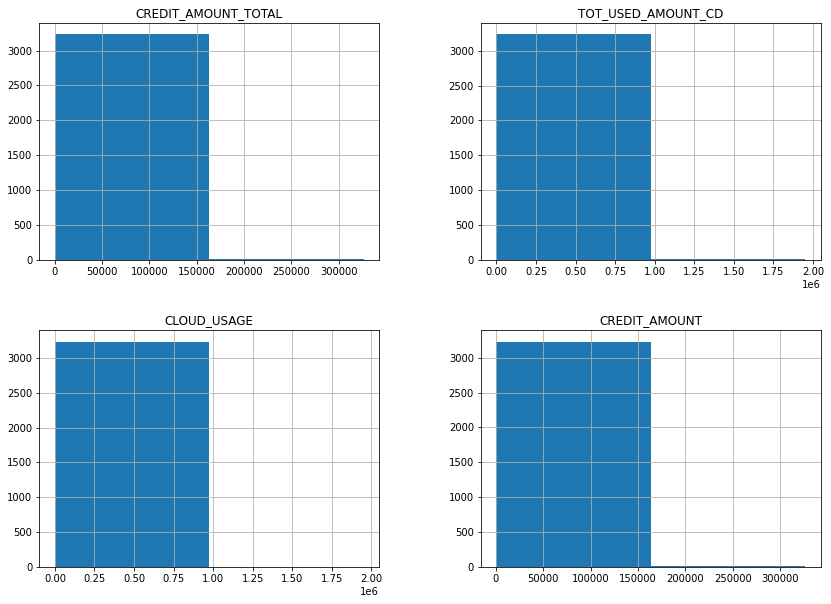

In [11]:
df[numerical_features].hist(bins=2, figsize=(14, 10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f24b00e9610>,
      dtype=object)

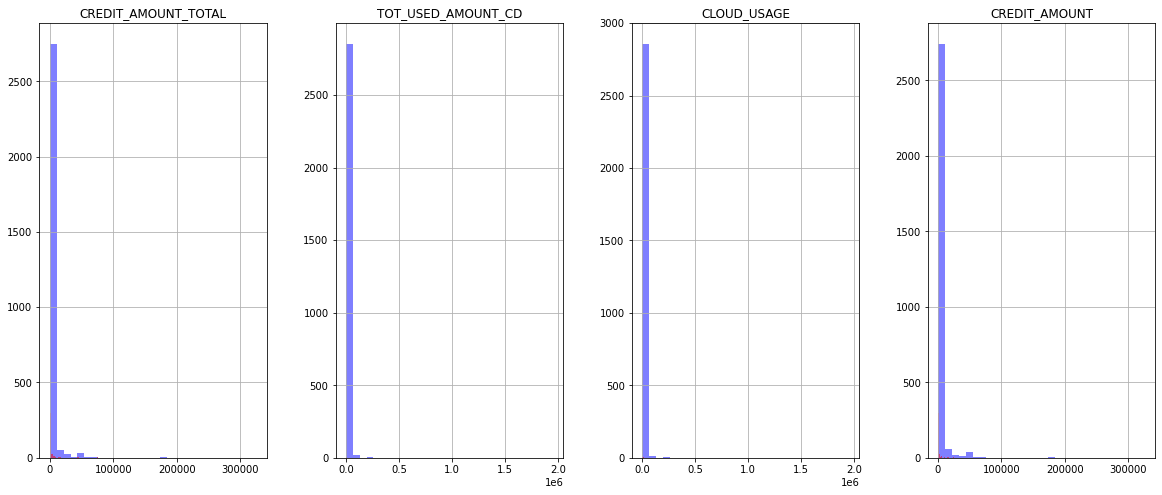

In [12]:
fig, ax = plt.subplots(1, 4, figsize=(20, 8))
df[df.CHURN == "NO"][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.CHURN == "YES"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)

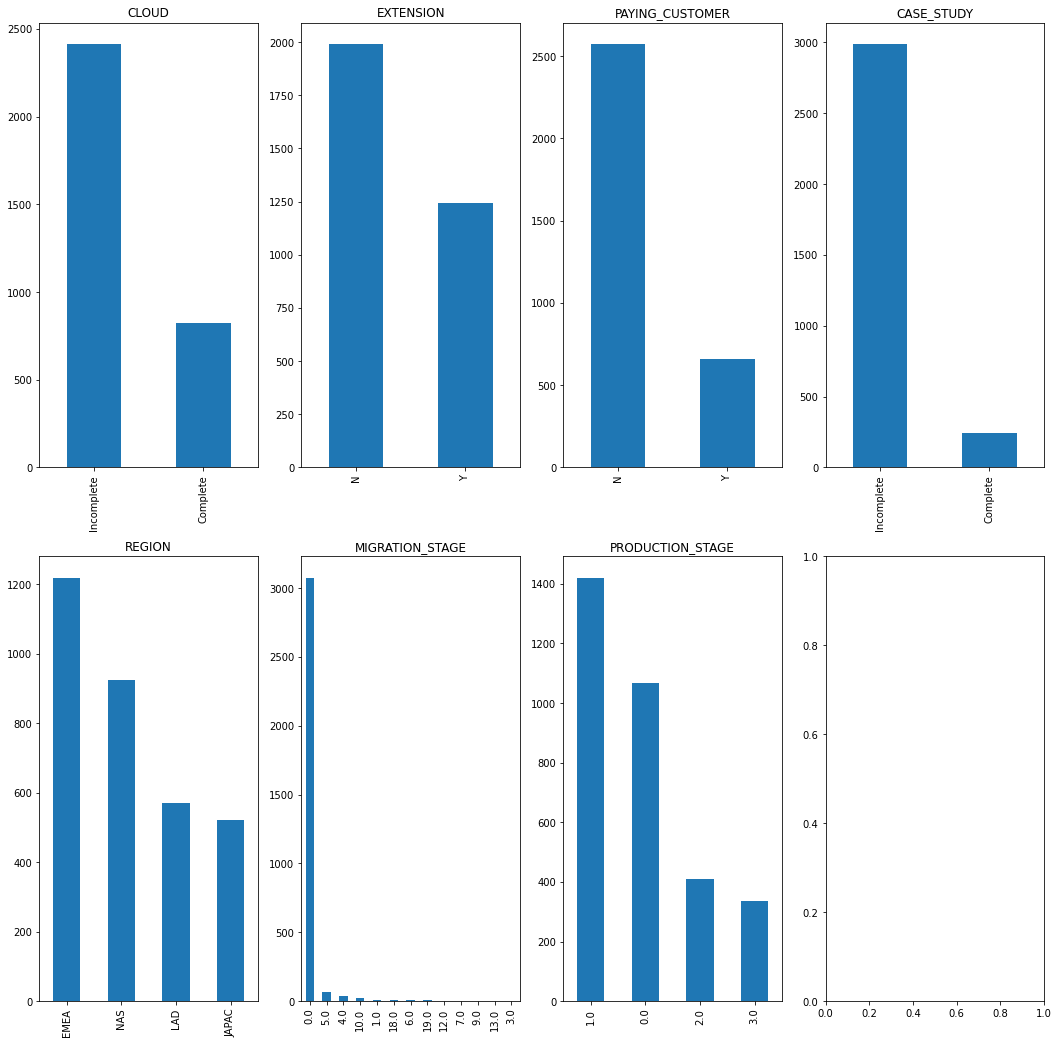

In [14]:
ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 18))
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_feature].value_counts().plot(kind='bar', ax=ax[row, col]).set_title(categorical_feature)

IndexError: ignored

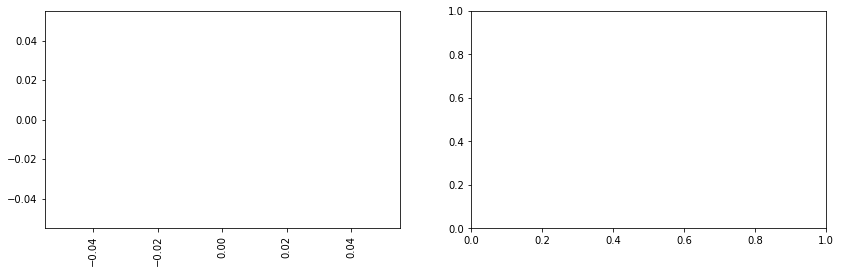

In [15]:
feature = 'CREDIT_AMOUNT_TOTAL'
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df[df.CHURN == "No"][feature].value_counts().plot(kind='bar', ax=ax[0]).set_title('not churned')
df[df.CHURN == "Yes"][feature].value_counts().plot(kind='bar', ax=ax[1]).set_title('churned')

Text(0.5, 1.0, 'churned')

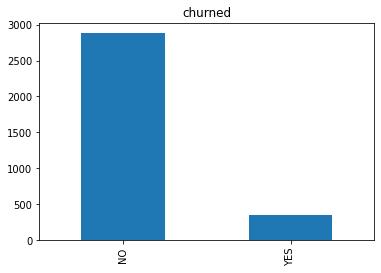

In [16]:
df[target].value_counts().plot(kind='bar').set_title('churned')

In [17]:
from sklearn.preprocessing import LabelEncoder

categorical_feature_names = []
label_encoders = {}
for categorical in categorical_features + [target]:
    label_encoders[categorical] = LabelEncoder()
    df[categorical] = label_encoders[categorical].fit_transform(df[categorical])
    names = label_encoders[categorical].classes_.tolist()
    print('Label encoder %s - values: %s' % (categorical, names))
    if categorical == target:
        continue
    categorical_feature_names.extend([categorical + '_' + str(name) for name in names])

Label encoder CLOUD - values: ['Complete', 'Incomplete']
Label encoder EXTENSION - values: ['N', 'Y']
Label encoder PAYING_CUSTOMER - values: ['N', 'Y']
Label encoder CASE_STUDY - values: ['Complete', 'Incomplete']
Label encoder REGION - values: ['EMEA', 'JAPAC', 'LAD', 'NAS']
Label encoder MIGRATION_STAGE - values: [0.0, 1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0, 10.0, 12.0, 13.0, 18.0, 19.0]
Label encoder PRODUCTION_STAGE - values: [0.0, 1.0, 2.0, 3.0]
Label encoder CHURN - values: ['NO', 'YES']


In [18]:
df.head()

,COUNTRY,EXTENSION,CREDIT_AMOUNT_TOTAL,STARTUP_ID,PAYING_CUSTOMER,SUBSCRIPTION_LINE_STATUS,MIGRATION_STAGE,PRODUCTION_STAGE,CHURN,CASE_STUDY,...,MENTOR_BENEFIT,MIGRATION_BENEFIT,ORDER_ID,PLAN_STATUS,PRIMARY_JOB_TITLE,SKU,TECHNOLOGY1,TECHNOLOGY2,TECHNOLOGY3,TOT_USED_AMOUNT_CD
0,Canada,0,0.00,1001,0,EXPIRED,0,1,0,1,...,N,N,12214,Active,Unknown,B90994,Unknown,Unknown,Unknown,0.00
1,United Kingdom,1,1130.99,227,1,EXPIRED,0,2,0,1,...,N,N,12202,Active,IT Manager,B90994,Cloud,Unknown,Unknown,60.53
2,United States of America,0,0.00,228,0,EXPIRED,0,0,0,1,...,N,N,12228,Active,CEO,B90994,Enterprise Management,Financial Management,Project Portfolio Management,27.24
3,United States of America,0,0.00,229,0,EXPIRED,0,1,0,1,...,N,N,12203,Active,Unknown,B90994,Unknown,Unknown,Unknown,141.52
4,United States of America,1,2000.00,230,0,EXPIRED,7,1,1,1,...,N,N,12212,Active,Unknown,B90994,Unknown,Unknown,Unknown,0.00


In [19]:
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, df):
        return df[self.key]

In [20]:
pipeline = Pipeline(
    [
        (
            "union",
            FeatureUnion(
                transformer_list=[
                    (
                        "categorical_features",
                        Pipeline(
                            [
                                ("selector", ItemSelector(key=categorical_features)),
                                ("onehot", OneHotEncoder(handle_unknown='ignore')),
                            ]
                        ),
                    )
                ]
                + [
                    (
                        "numerical_features",
                        Pipeline(
                            [
                                ("selector", ItemSelector(key=numerical_features)),
                                ("scalar", StandardScaler()),
                            ]
                        ),
                    )
                ]
            ),
        ),
        ("classifier", tree.DecisionTreeClassifier(max_depth=3, random_state=42)),
    ]
)

In [21]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.25, random_state=42)

pipeline.fit(df_train, df_train[target])
pred = pipeline.predict(df_test)

### Testing the model

In [22]:
from sklearn.metrics import classification_report

print(classification_report(df_test[target], pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       711
           1       0.00      0.00      0.00        98

    accuracy                           0.88       809
   macro avg       0.44      0.50      0.47       809
weighted avg       0.77      0.88      0.82       809



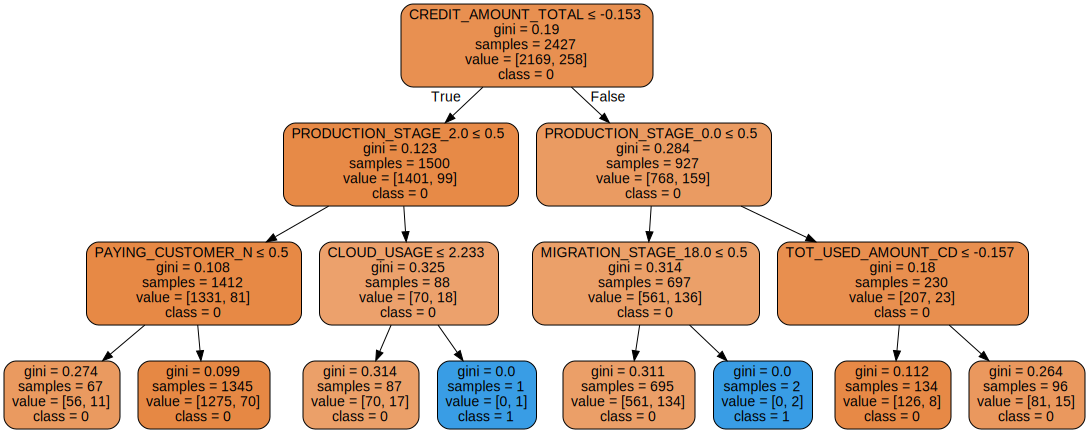

In [23]:
dot_data = tree.export_graphviz(pipeline.named_steps['classifier'], out_file=None, 
                         feature_names = (categorical_feature_names + numerical_features),
                         class_names=[str(el) for el in pipeline.named_steps.classifier.classes_],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

In [24]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix

cf_matrix = confusion_matrix(df_test, pred)

print(cf_matrix)

TypeError: ignored